<a href="https://colab.research.google.com/github/EddyGiusepe/Previsao_de_rotatividade_Churn_prediction_Tensorflow/blob/main/Churn_Prediction_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de rotatividade  (Churn prediction)

Aqui vamos a realizar uma abordagem para prever o desgaste do cliente usando algoritmos de aprendizado de máquina supervisionado em Python. 

O atrito com o cliente ( também conhecido como rotatividade de clientes ) é um dos maiores gastos de qualquer organização. Se pudéssemos descobrir por que um cliente sai e quando sai com uma precisão razoável, isso ajudaria imensamente a organização a criar estratégias para suas múltiplas iniciativas de retenção. Vamos usar um conjunto de dados de transações do cliente ``Churn.csv`` para entender as principais etapas envolvidas na previsão do atrito do cliente em Python.


Uma boa explicação pode ser encontrada no [YouTube](https://www.youtube.com/watch?v=6_2hzRopPbQ).



## Importamos nossas bibliotecas e nossos Dados

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline




from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Apenas_TensorFlow_Eddy/Nicholas_Renotte_YouTube_Tensorflow_Tutorial/Tensorflow-in-10-Minutes/Churn.csv')

In [3]:
df.head(3)

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
df.shape

(7044, 21)

In [5]:
# Verificamos se temos valores "nan"

df.isna().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [6]:
# Nome de nossas colunas

df.columns


Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [7]:
# Vejamos nossa Target

df['Churn'].value_counts()

No     5175
Yes    1869
Name: Churn, dtype: int64

## Dividimos nossos Dados em Dados de treino e teste

In [8]:
x = pd.get_dummies(df.drop(['Churn', 'Customer ID'], axis=1))
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [9]:
y.sample(5)

3768    0
856     1
6952    0
323     0
1689    0
Name: Churn, dtype: int64

In [10]:
# Vejamos novamente nosso Target

y.value_counts()

0    5175
1    1869
Name: Churn, dtype: int64

In [11]:
# Fazendo a divisão de nossos Dados:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)



In [12]:
y_train.head()

6948    0
3985    0
4427    0
169     1
4140    0
Name: Churn, dtype: int64

## Construimos e compilamos nosso modelo (Red Neural)


In [13]:
# Construindo nossa Red Neural
model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=len(x_train.columns)))
model.add(Dropout(0.70))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.70))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.70))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.70))
model.add(Dense(units=1, activation='sigmoid'))

In [14]:
# Compilando nosso modelo

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

## Vamos ajustar, predezir e avaliar nosso modelo

In [15]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=400, batch_size=70, verbose=0)

In [16]:
model.evaluate(x_test, y_test)

56/56 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7359


[0.5772632956504822, 0.735945463180542]

In [17]:
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)

56/56 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7359


In [18]:
print('Train: %.3f, Test: %.3f'% (train_acc, test_acc))

Train: 0.734, Test: 0.736


In [19]:
# Podemos usar desta forma:
#y_pred = model.predict(x_test)
#y_pred = [0 if val < 0.5 else 1 for val in y_pred]



# ou o que está aqui embaixo
y_pred = model.predict(x_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

[0.26582253 0.26582253 0.26582253 0.26582253 0.26582253 0.26582253
 0.26582253 0.26582253 0.26582253 0.26582253]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
# Comparamos com nossos Dados
y_test[:10]

6626    1
3676    0
6670    0
5631    1
3481    0
2305    0
929     0
3148    0
3757    1
3840    0
Name: Churn, dtype: int64

In [21]:
accuracy_score(y_test, y_pred)

0.7359454855195912

In [22]:
print("A nossa matriz de confusão é: ")
print(confusion_matrix(y_test, y_pred))

A nossa matriz de confusão é: 
[[1296    0]
 [ 465    0]]


In [23]:
print("Nosso relatório de classificação é: ")
print(classification_report(y_test, y_pred))


Nosso relatório de classificação é: 
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1296
           1       0.00      0.00      0.00       465

    accuracy                           0.74      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.74      0.62      1761



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


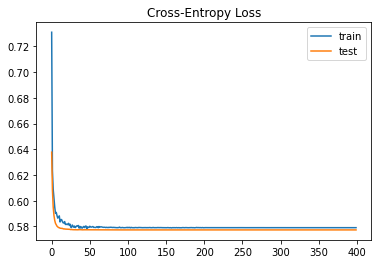

In [24]:
# plot loss learning curves

plt.title('Cross-Entropy Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

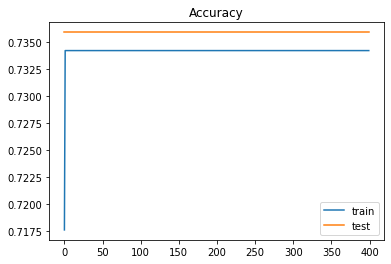

In [25]:
# plot accuracy learning curves

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


**NOTA:**
É recomendável seguir treinando o modelo para obter um valor menor da ``Loss`` e um valor mais alto da ``accuracy``.
